In [26]:
import sys
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sys.path.append('../')

In [3]:
from pparser import Parser
from scripts import parse_grammars

Reading the rules from file

In [4]:
rules, root = parse_grammars('../french/grammar-prune.txt')

In [5]:
sentences = []
with open ('/home/divserge/YaDisk/Skoltech/pcfg_parser/french/test_lim.toparse') as f:
    for l in f:
        sent = [w.split('^')[0] for w in l.split()[:-1]][:20]
        sentences.append(' '.join(sent))

In [10]:
np.random.seed(42)
subsample = np.random.choice(sentences, 10)

In [16]:
for decomposition in ['tt']:
    for rank in [10, 50, 100, 150]:
        print(rank)
        times[decomposition][rank] = []
        p = Parser(rules=rules, roots=root, approximation=decomposition, rank=rank)
        for sent in subsample:
            start = time()
            for i in range(3):
                p.parse(sent)
            end = time()
            times[decomposition][rank].append((end - start) / 10)

10
50
100
150


In [17]:
for decomposition in ['tucker']:
    for rank in [100, 150]:
        print(rank)
        times[decomposition][rank] = []
        p = Parser(rules=rules, roots=root, approximation=decomposition, rank=rank)
        for sent in subsample:
            start = time()
            for i in range(3):
                p.parse(sent)
            end = time()
            times[decomposition][rank].append((end - start) / 10)

100
150


In [18]:
times['exact'] = []
p = Parser(rules=rules, roots=root, approximation='exact', rank=0)
for sent in subsample:
    start = time()
    p.parse(sent)
    end = time()
    times['exact'].append(end - start)

In [32]:
lengths = [len(sent.split()) for sent in subsample]
max_length = np.where(np.array(lengths) == 20)[0]

In [46]:
ranks = [150, 100, 50, 10]

lines_tt = []
for sent_index in max_length:
    lines_tt.append([])
    for i, rank in enumerate(ranks):
        lines_tt[-1].append(times['tt'][rank][sent_index] * 10. / 3)
        
lines_tucker = []
for sent_index in max_length:
    lines_tucker.append([])
    for i, rank in enumerate(ranks):
        lines_tucker[-1].append(times['tucker'][rank][sent_index] * (10. / 3 if rank > 99 else (1.0)))
        
mean_line_tt = np.array(lines_tt).mean(axis = 0)
mean_line_tucker = np.array(lines_tucker).mean(axis = 0)
mean_line_exact = [np.array(times['exact'])[max_length].mean()]*4

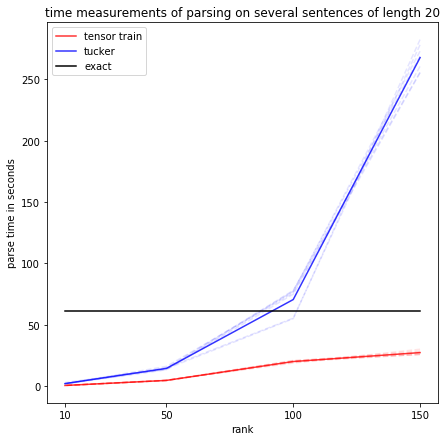

In [67]:
plt.figure(figsize=(7,7))
for line in lines_tt:
    plt.plot(ranks, line, c='r', alpha=0.10, linestyle='--')
    
for line in lines_tucker:
    plt.plot(ranks, line, c='b', alpha=0.10, linestyle='--')

plt.plot(ranks, mean_line_tt, c='r', alpha=0.8, label='tensor train')
plt.plot(ranks, mean_line_tucker, c='b', alpha=0.8, label='tucker')
plt.plot(ranks, mean_line_exact, c='black', alpha=1.0, label='exact')
plt.xlabel('rank')
plt.ylabel('parse time in seconds')
plt.title('time measurements of parsing on several sentences of length 20')
plt.xticks(ranks)
plt.legend()

In [55]:
lines_tt[0]

[29.948224703470867, 18.65022627512614, 4.78184453646342, 0.4227478504180908]

In [59]:
ranks

[150, 100, 50, 10]